In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Ahora revisaremos datos de la calidad de aire en Europa

In [2]:
data = pd.read_csv(
    'Datos/20000101_20161231-NO2.csv',
    sep=';',
    skiprows=[1],
    na_values=['n/d'],
    index_col=0,
    parse_dates=True)

In [3]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


Ahora a contestar preguntas clásicas:

¿La contaminacion ha disminuido ?

In [4]:
data['1999':].resample('M').mean()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-31,96.896127,87.108108,69.820027,37.961290
2000-02-29,92.193437,88.695024,63.164502,35.393939
2000-03-31,108.150070,84.986505,62.695946,42.619308
2000-04-30,96.270950,85.221448,58.670851,30.706704
2000-05-31,99.247632,82.153639,51.150000,29.678426
...,...,...,...,...
2016-08-31,70.708844,NaN,27.248313,15.411051
2016-09-30,94.813370,59.133824,41.385075,26.571229
2016-10-31,79.289367,52.745602,44.506073,30.309973


<AxesSubplot:xlabel='timestamp'>

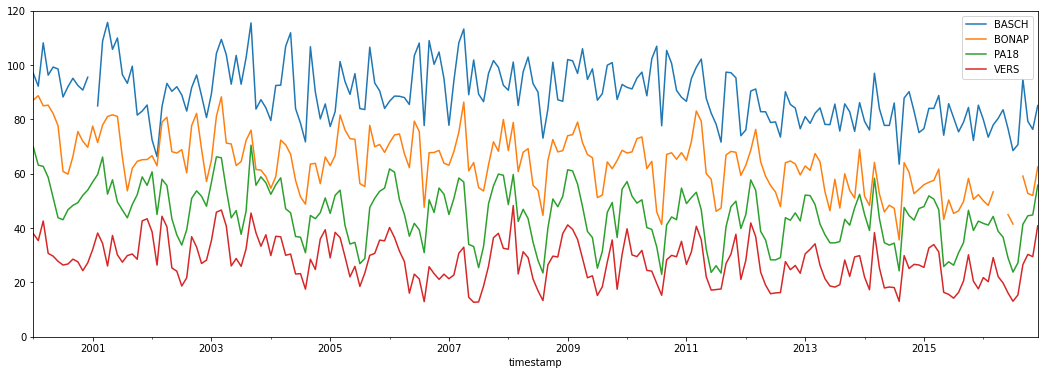

In [5]:
data['1999':].resample('M').mean().plot(ylim=[0,120], figsize=(18,6))

<AxesSubplot:xlabel='timestamp'>

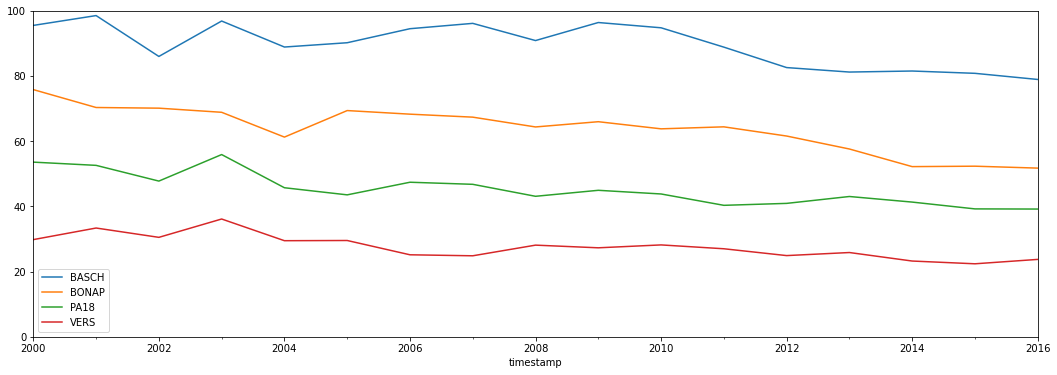

In [6]:
data['1999':].resample('A').mean().plot(ylim=[0,100],figsize=(18,6))

In [7]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [8]:
#Obtenes datos ppor fines de semana y le estamos creando su columna
data['weekday'] = data.index.weekday
#si la semana esta entre 5 y 6 pasan los datos a los que nos interesan
data['weekend'] = data['weekday'].isin([5, 6])

In [9]:
data.head()

,BASCH,BONAP,PA18,VERS,weekday,weekend
timestamp,,,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0,5,True
2000-01-01 02:00:00,104.0,60.0,77.0,42.0,5,True
2000-01-01 03:00:00,97.0,58.0,73.0,34.0,5,True
2000-01-01 04:00:00,77.0,52.0,57.0,29.0,5,True
2000-01-01 05:00:00,79.0,52.0,64.0,28.0,5,True


In [10]:
data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)

weekend,False,True
timestamp,,
0,62.683270,77.040828
1,51.150107,68.010059
2,44.088698,59.186060
3,43.542551,53.515366
4,53.439094,53.383797
5,75.816097,57.954438
6,100.541348,63.734754
7,116.539861,67.481350
8,119.477955,70.618483


<AxesSubplot:xlabel='timestamp'>

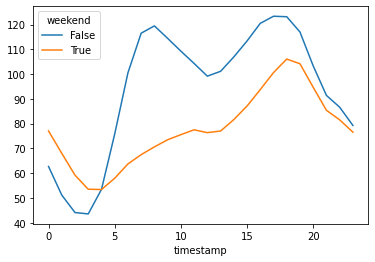

In [11]:
# agrúpalo por fines de semana y calcula el promedio
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()